In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
human_genes = pd.read_table('../homework/Homo_sapiens.GRCh38.111.gtf.txinfo.tsv.gz', low_memory=False)
human_genes

,tx_name,gene_id,chrom,strand,nexon,tx_len,cds_len,utr5_len,utr3_len,ccds_id,...,ccds,ensembl_canonical,mane_plus_clinical,mane_select,basic,cds_end_nf,cds_start_nf,mrna_end_nf,mrna_start_nf,seleno
0,ENST00000624431,ENSG00000279928,1,+,5,570,0,0,0,NaN,...,False,True,False,False,True,False,False,False,False,False
1,ENST00000424215,ENSG00000228037,1,+,3,626,0,0,0,NaN,...,False,True,False,False,True,False,False,False,False,False
2,ENST00000511072,ENSG00000142611,1,+,16,4282,3537,92,653,NaN,...,False,False,False,False,True,False,False,False,False,False
3,ENST00000607632,ENSG00000142611,1,+,2,581,0,0,0,NaN,...,False,False,False,False,False,False,False,False,False,False
4,ENST00000378391,ENSG00000142611,1,+,17,5447,3774,63,1610,CCDS44048,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252984,ENST00000612640,ENSG00000271254,KI270711.1,-,16,2116,2019,71,26,NaN,...,False,True,False,False,True,False,False,False,False,False
252985,ENST00000618083,ENSG00000275987,KI270713.1,-,1,144,0,0,0,NaN,...,False,True,False,False,True,False,False,False,False,False
252986,ENST00000601199,ENSG00000268674,KI270713.1,+,1,510,510,0,0,NaN,...,False,True,False,False,True,False,False,False,False,False
252987,ENST00000612315,ENSG00000277475,KI270713.1,-,1,831,531,156,144,NaN,...,False,True,False,False,True,False,False,False,False,False


In [3]:
# number of genes
human_genes['gene_id'].unique().size

63241

In [4]:
# number of protein-coding genes
human_genes[human_genes['gene_biotype'] == 'protein_coding']['gene_id'].unique().size

20073

In [5]:
# number of genes belonging to different types
(human_genes
 .drop_duplicates(subset=['gene_id', 'gene_biotype'])['gene_biotype']
 .value_counts()
)

gene_biotype
protein_coding                        20073
lncRNA                                19370
processed_pseudogene                  10145
unprocessed_pseudogene                 2604
misc_RNA                               2217
snRNA                                  1910
miRNA                                  1879
TEC                                    1054
transcribed_unprocessed_pseudogene      962
snoRNA                                  942
transcribed_processed_pseudogene        513
rRNA_pseudogene                         497
IG_V_pseudogene                         187
transcribed_unitary_pseudogene          158
IG_V_gene                               145
TR_V_gene                               107
unitary_pseudogene                      100
TR_J_gene                                79
rRNA                                     53
scaRNA                                   49
IG_D_gene                                37
TR_V_pseudogene                          33
Mt_tRNA            

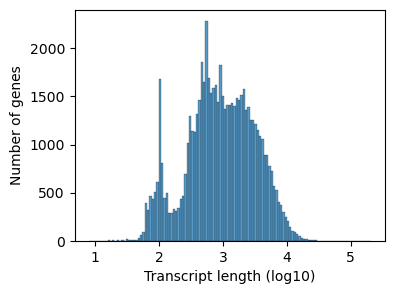

In [11]:
# transcript length distribution
# keep a single transcript (canonical one) for each gene
txrep = human_genes[human_genes['ensembl_canonical'] == True]

# adjust figure size
plt.figure(figsize=(4, 3))
ax = sns.histplot(x=np.log10(txrep['tx_len']))
ax.set(xlabel='Transcript length (log10)', ylabel='Number of genes')

# export to pdf
ax.figure.savefig('txlen_distribution.pdf', bbox_inches='tight')

In [8]:
# mean number of transcripts per gene
human_genes.groupby('gene_id').size().mean()

np.float64(4.000395313167091)

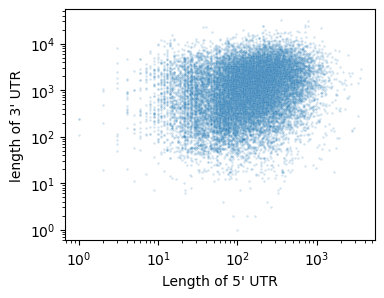

In [9]:
# relationship between 5' UTR length and 3' UTR length
txrep_pcg = txrep[txrep['gene_biotype'] == 'protein_coding']

plt.figure(figsize=(4, 3))
ax = sns.scatterplot(x='utr5_len', y='utr3_len', data=txrep_pcg, s=3, alpha=0.2)
ax.set(xlabel="Length of 5' UTR", ylabel="length of 3' UTR", xscale='log', yscale='log')
ax.figure.savefig('utr5_vs_utr3.pdf', bbox_inches='tight')